<h1 style='text-align:center; background-color:darkgreen; color:white; padding:10px'>IMDB DataSet from Kaggle</h1>

In [1]:
#IMPORT LIBRARIES
import os 
import pandas as pd
import numpy as np
import re

In [2]:
# Getting the dataset's Path in the "files" directory
for root, dirs, files in os.walk('files'):
    for file in files:
        print(os.path.join(root, file))

files\IMDb_All_Genres_etf_clean1.csv
files\imdb_threshed.csv
files\movie_actors.csv
files\.ipynb_checkpoints\IMDb_All_Genres_etf_clean1-checkpoint.csv
files\.ipynb_checkpoints\imdb_threshed-checkpoint.csv


In [3]:
# Reading data to a Pandas DataFrame
# na_values = Strings that should be considered as null
imdb = pd.read_csv('files\IMDb_All_Genres_etf_clean1.csv', na_values=['', '-'])

<h2 style='text-align:center; background-color:darkgreen; color:white; padding:10px'>Preliminary Data analyzes</h2>

In [4]:
imdb.head()

,Movie_Title,Year,Director,Actors,Rating,Runtime(Mins),Censor,Total_Gross,main_genre,side_genre
0,Kantara,2022,Rishab Shetty,"Rishab Shetty, Sapthami Gowda, Kishore Kumar G...",9.3,148,UA,Gross Unkown,Action,"Adventure, Drama"
1,The Dark Knight,2008,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",9.0,152,UA,$534.86M,Action,"Crime, Drama"
2,The Lord of the Rings: The Return of the King,2003,Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",9.0,201,U,$377.85M,Action,"Adventure, Drama"
3,Inception,2010,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",8.8,148,UA,$292.58M,Action,"Adventure, Sci-Fi"
4,The Lord of the Rings: The Two Towers,2002,Peter Jackson,"Elijah Wood, Ian McKellen, Viggo Mortensen, Or...",8.8,179,UA,$342.55M,Action,"Adventure, Drama"


In [5]:
#shape = rows x columns
imdb.shape

(5562, 10)

In [6]:
# Information
imdb.info()

# Notice: 
    # that there is no null value anyway
    # data types for numeric types are ok except by the Total_Gross (see Total Gross Section Down Below)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5562 entries, 0 to 5561
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Movie_Title    5562 non-null   object 
 1   Year           5562 non-null   int64  
 2   Director       5562 non-null   object 
 3   Actors         5562 non-null   object 
 4   Rating         5562 non-null   float64
 5   Runtime(Mins)  5562 non-null   int64  
 6   Censor         5562 non-null   object 
 7   Total_Gross    5562 non-null   object 
 8   main_genre     5562 non-null   object 
 9   side_genre     5562 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 434.7+ KB


In [7]:
# Correlation between columns
imdb.corr()

,Year,Rating,Runtime(Mins)
Year,1.000000,-0.291711,0.022971
Rating,-0.291711,1.000000,0.323256
Runtime(Mins),0.022971,0.323256,1.000000


In [8]:
#Statistical Information
imdb.describe()

# Notice that although There is no corelation betweem columns, there is a correlation between number of movies and their year. 
# Despite the oldest movie is from 1920, just 25% of them are from before 1997. This will be ilustrated at the chart down below.

,Year,Rating,Runtime(Mins)
count,5562.000000,5562.000000,5562.000000
mean,2002.792521,6.755861,112.226717
std,16.143990,0.937133,21.612655
min,1920.000000,1.000000,45.000000
25%,1997.000000,6.200000,97.000000
50%,2007.000000,6.800000,108.000000
75%,2014.000000,7.400000,123.000000
max,2022.000000,9.300000,321.000000


In [9]:
#Duplications
imdb[imdb.duplicated()]

,Movie_Title,Year,Director,Actors,Rating,Runtime(Mins),Censor,Total_Gross,main_genre,side_genre
1572,Rush,2013,Ron Howard,"Daniel Brühl, Chris Hemsworth, Olivia Wilde, A...",8.1,123,R,$26.95M,Action,"Biography, Drama"
2567,Filth,2013,Jon S. Baird,"James McAvoy, Jamie Bell, Eddie Marsan, Imogen...",7.0,97,A,$0.03M,Action,"Comedy, Crime"
2675,The Heat,2013,Paul Feig,"Sandra Bullock, Michael McDonald, Melissa McCa...",6.6,117,A,$159.58M,Action,"Comedy, Crime"
2705,Homefront,2013,Gary Fleder,"Jason Statham, James Franco, Winona Ryder, Kat...",6.5,100,18,$20.16M,Action,"Crime, Thriller"
2780,Hummingbird,2013,Steven Knight,"Jason Statham, Agata Buzek, Vicky McClure, Ben...",6.2,100,A,$0.03M,Action,"Crime, Drama"
4450,Elysium,2013,Neill Blomkamp,"Matt Damon, Jodie Foster, Sharlto Copley, Alic...",6.6,109,A,$93.05M,Action,"Drama, Sci-Fi"
4563,Snitch,2013,Ric Roman Waugh,"Dwayne Johnson, Susan Sarandon, Jon Bernthal, ...",6.4,112,UA,$42.93M,Action,"Drama, Thriller"
4705,The Machine,2013,Caradog W. James,"Toby Stephens, Caity Lotz, Denis Lawson, Sam H...",6.0,91,R,Gross Unkown,Action,"Drama, Sci-Fi"


In [10]:
# Removing duplications
imdb.drop_duplicates(inplace=True)

<h2 style='text-align:center; background-color:darkgreen; color:white; padding:10px'>Visualizations</h2>

<AxesSubplot: title={'center': 'Quantity of Movies per Year'}, xlabel='Year'>

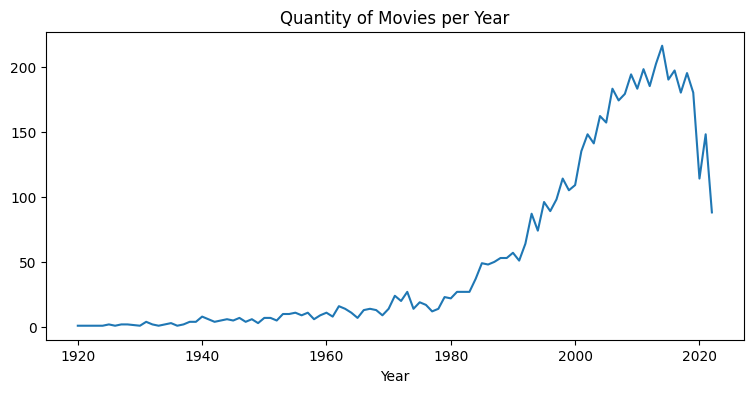

In [11]:
# Chart to show the high quantity of newer movies

year_qtd = imdb['Year'].value_counts().sort_index()
year_qtd.plot(
    title = 'Quantity of Movies per Year',
    figsize = (9,4),
    xlabel = 'Year'
)


<AxesSubplot: title={'center': 'Top 10 Directors whit more movies'}>

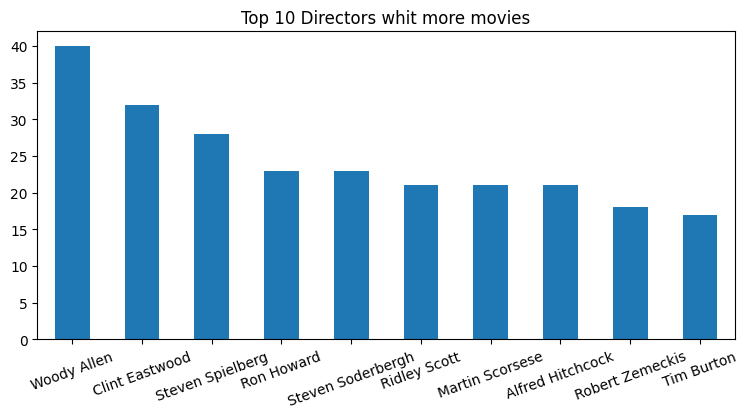

In [12]:
# Top 10 directors in quantity of movies in this data set

imdb['Director'].value_counts()[:10].plot(
    kind='bar',
    title = 'Top 10 Directors whit more movies',
    figsize = (9,4),
    rot = 20
)

<AxesSubplot: title={'center': 'Top Directors by Rating'}>

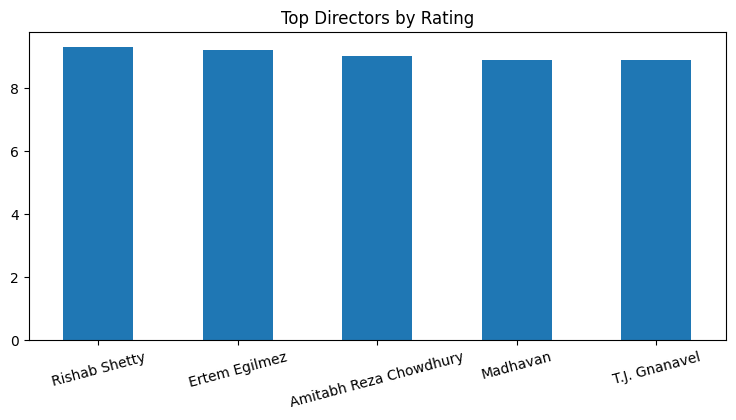

In [13]:
# Top 5 directors in mean rating

imdb.groupby('Director')['Rating'].mean().sort_values(ascending=False)[:5].plot(
    kind = 'bar',
    figsize = (9,4),
    title = 'Top Directors by Rating',
    rot = 15,
    xlabel = ''
)

In [14]:
# TOP Movies by Rating
imdb.sort_values('Rating', ascending=False)[['Movie_Title', 'Rating']][:5]

,Movie_Title,Rating
0,Kantara,9.3
3448,The Shawshank Redemption,9.3
3449,Hababam Sinifi,9.2
2253,The Godfather,9.2
2,The Lord of the Rings: The Return of the King,9.0


In [15]:
# TOP Actors with most appearances
# How I saw that the actors are separeted by comma, thus I first join them all using comma too, then I splited them into a Pandas Series 
# so I can use the value_counts functions to discover they appearances.

actors = imdb['Actors']
pd.Series(', '.join(list(actors)).split(', ')).value_counts()[:5]

Robert De Niro       61
Tom Hanks            49
Samuel L. Jackson    48
Nicolas Cage         47
Mark Wahlberg        42
dtype: int64

<h2 style='text-align:center; background-color:darkgreen; color:white; padding:10px; margin:0px'>Feature Engineering</h2>
<h3 style='text-align:center; background-color:darkgreen; color:white; padding:10px; margin:0px'>Total Gross</h3>

<p>
    <ol>
        <li>First, to order by the total gross, whe have to change the type into a numeric type. As whe can see, there is a dollar sign in the left and a 'M' at the end that probably means Million.</li> 
        <li>Then, lets check if all the rows match this pattern in the step 1. </li>
        <li>Then, lets drop the non-pattern values. Lastly, lets order by the float conversion of the values.</li>
    </ol>
</p>

In [16]:
# Step 1
# We already know that there is no null value.
# Now we know that there is no other possibility: either it are in the patter '$123.45M' or it is 'Gross unknow'

imdb.loc[~imdb['Total_Gross'].str.contains(r'^\$[0-9.]+M$')]['Total_Gross'].unique()

array(['Gross Unkown'], dtype=object)

In [17]:
# Step 2
# Lets remove the 861 rowns whit the 'Gross Unknow'

gross = imdb.drop(imdb[imdb['Total_Gross'] == 'Gross Unkown'].index)

In [18]:
# Finaly, lets Sort by the float values

gross.sort_values('Total_Gross', ascending=False, key=lambda x: x.str.extract(r'([0-9.]+)', expand=False).astype(float)).head(5)

,Movie_Title,Year,Director,Actors,Rating,Runtime(Mins),Censor,Total_Gross,main_genre,side_genre
130,Star Wars: Episode VII - The Force Awakens,2015,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",7.8,138,U,$936.66M,Action,"Adventure, Sci-Fi"
19,Avengers: Endgame,2019,"Directors:Anthony Russo, Joe Russo","Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",8.4,181,UA,$858.37M,Action,"Adventure, Drama"
31,Spider-Man: No Way Home,2021,Jon Watts,"Tom Holland, Zendaya, Benedict Cumberbatch, Ja...",8.3,148,UA,$804.75M,Action,"Adventure, Fantasy"
142,Avatar,2009,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",7.8,162,UA,$760.51M,Action,"Adventure, Fantasy"
317,Black Panther,2018,Ryan Coogler,"Chadwick Boseman, Michael B. Jordan, Lupita Ny...",7.3,134,UA,$700.06M,Action,"Adventure, Sci-Fi"


In [19]:
# Replacing the total gross type to float (ps: unknow -> 0.0)

imdb.loc[imdb['Total_Gross'] == 'Gross Unkown', 'Total_Gross'] = '0'
imdb['Total_Gross'] = imdb['Total_Gross'].str.replace('$', '', regex=False).str.replace('M', '', regex=False)
imdb['Total_Gross'] = imdb['Total_Gross'].astype(float) * 1000000

In [20]:
imdb

,Movie_Title,Year,Director,Actors,Rating,Runtime(Mins),Censor,Total_Gross,main_genre,side_genre
0,Kantara,2022,Rishab Shetty,"Rishab Shetty, Sapthami Gowda, Kishore Kumar G...",9.3,148,UA,0.0,Action,"Adventure, Drama"
1,The Dark Knight,2008,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",9.0,152,UA,534860000.0,Action,"Crime, Drama"
2,The Lord of the Rings: The Return of the King,2003,Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",9.0,201,U,377850000.0,Action,"Adventure, Drama"
3,Inception,2010,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",8.8,148,UA,292580000.0,Action,"Adventure, Sci-Fi"
4,The Lord of the Rings: The Two Towers,2002,Peter Jackson,"Elijah Wood, Ian McKellen, Viggo Mortensen, Or...",8.8,179,UA,342550000.0,Action,"Adventure, Drama"
...,...,...,...,...,...,...,...,...,...,...
5557,Disaster Movie,2008,"Directors:Jason Friedberg, Aaron Seltzer","Carmen Electra, Vanessa Lachey, Nicole Parker,...",1.9,87,PG-13,14190000.0,Comedy,Sci-Fi
5558,The Hottie & the Nottie,2008,Tom Putnam,"Paris Hilton, Joel David Moore, Christine Laki...",1.9,91,PG-13,30000.0,Comedy,Romance
5559,From Justin to Kelly,2003,Robert Iscove,"Kelly Clarkson, Justin Guarini, Katherine Bail...",1.9,81,PG,4920000.0,Comedy,"Musical, Romance"
5560,Superbabies: Baby Geniuses 2,2004,Bob Clark,"Jon Voight, Scott Baio, Vanessa Angel, Skyler ...",1.5,88,PG,9110000.0,Comedy,"Family, Sci-Fi"


<h3 style='text-align:center; background-color:darkgreen; color:white; padding:10px; margin:0px'>Duplicated Names</h3>

In [21]:
# looking for movies with the same name
imdb[imdb['Movie_Title'].duplicated()].head()

,Movie_Title,Year,Director,Actors,Rating,Runtime(Mins),Censor,Total_Gross,main_genre,side_genre
516,The Italian Job,2003,F. Gary Gray,"Donald Sutherland, Mark Wahlberg, Edward Norto...",7.0,111,UA,106130000.0,Action,"Crime, Thriller"
550,Ghostbusters,2016,Paul Feig,"Melissa McCarthy, Kristen Wiig, Kate McKinnon,...",6.9,117,UA,128340000.0,Action,"Comedy, Fantasy"
597,The Magnificent Seven,2016,Antoine Fuqua,"Denzel Washington, Chris Pratt, Ethan Hawke, V...",6.8,132,UA,93430000.0,Action,"Adventure, Western"
989,Death Wish,2018,Eli Roth,"Bruce Willis, Vincent D'Onofrio, Elisabeth Shu...",6.3,107,UA,34020000.0,Action,"Crime, Drama"
1000,Assault on Precinct 13,2005,Jean-François Richet,"Ethan Hawke, Laurence Fishburne, Gabriel Byrne...",6.3,109,R,19980000.0,Action,"Crime, Drama"


In [22]:
# Adding Year in the Title to avoid duplicated names.

imdb['Movie_Title'] = imdb['Movie_Title'] + ' (' + imdb['Year'].astype(str) + ')'

In [23]:
# Looking for duplicate Titles again.
# Now, it looks like consistency errors on the source.

imdb[imdb['Movie_Title'].duplicated(keep=False)].head()

,Movie_Title,Year,Director,Actors,Rating,Runtime(Mins),Censor,Total_Gross,main_genre,side_genre
356,The Suicide Squad (2021),2021,James Gunn,"Margot Robbie, Idris Elba, John Cena, Joel Kin...",7.2,132,A,0.0,Action,"Adventure, Comedy"
520,Taxi (1998),1998,Gérard Pirès,"Samy Naceri, Frédéric Diefenthal, Marion Cotil...",7.0,86,U,270000.0,Action,"Comedy, Crime"
1185,Point of No Return (1993),1993,John Badham,"Bridget Fonda, Gabriel Byrne, Dermot Mulroney,...",6.1,109,A,30040000.0,Action,"Crime, Drama"
2597,Taxi (1998),1998,Gérard Pirès,"Samy Naceri, Frédéric Diefenthal, Marion Cotil...",6.9,86,U,270000.0,Action,"Comedy, Crime"
2815,Point of No Return (1993),1993,John Badham,"Bridget Fonda, Gabriel Byrne, Dermot Mulroney,...",6.1,109,R,30040000.0,Action,"Crime, Drama"


In [24]:
# Removing Duplicates for simplicity.

imdb.drop_duplicates(subset='Movie_Title', inplace=True)

In [25]:
# Reseting index to be used as id_movie
imdb.reset_index(drop=True)
imdb.index.rename('id_movie', inplace=True)

In [26]:
# exporting to csv in order to be used in power bi

imdb.to_csv('./files/imdb_threshed.csv', sep=';', index=True)

<h3 style='text-align:center; background-color:darkgreen; color:white; padding:10px; margin:0px'>Actors</h3>

In [27]:
movie_actors = imdb['Actors'].apply(lambda x: x.split(', '))
movie_actors = actors.explode()
movie_actors.rename('name', inplace=True)

movie_actors.to_csv('files/movie_actors.csv', sep=';')